# LeNet-5 Implementation on MNIST in PyTorch

Complete implementation and analysis of building LeNet-5 model from scratch in PyTorch and training on MNIST dataset.

# Dataset Preparation

## Dowload the dataset

In [1]:
from torchvision import datasets

In [2]:
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=True)

## Analyze the dataset

In [3]:
train_val_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets/
     Split: Train,
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets/
     Split: Test)

In [4]:
class_names = train_val_dataset.classes
class_names[0]

'0 - zero'

In [5]:
class_index = train_val_dataset.class_to_idx
class_index

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [6]:
img, label = train_val_dataset[0]
img, label

(<PIL.Image.Image image mode=L size=28x28>, 5)

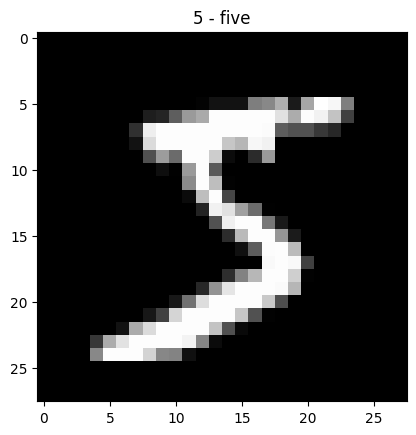

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.title(f"{class_names[label]}");

In [8]:
import numpy as np

def img_pixel_superimpose(img, ax):
    w, h = img.shape
    color_map = plt.cm.get_cmap('gray_r')  # gray_reversed
    ax.imshow(img, cmap='gray')
    for x in range(w):
        for y in range(h):
            color = color_map(img[x][y])
            ax.annotate(str(img[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center',
                        color=color)
            plt.axis(False)


/tmp/ipykernel_8419/3707614303.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('gray_r')  # gray_reversed


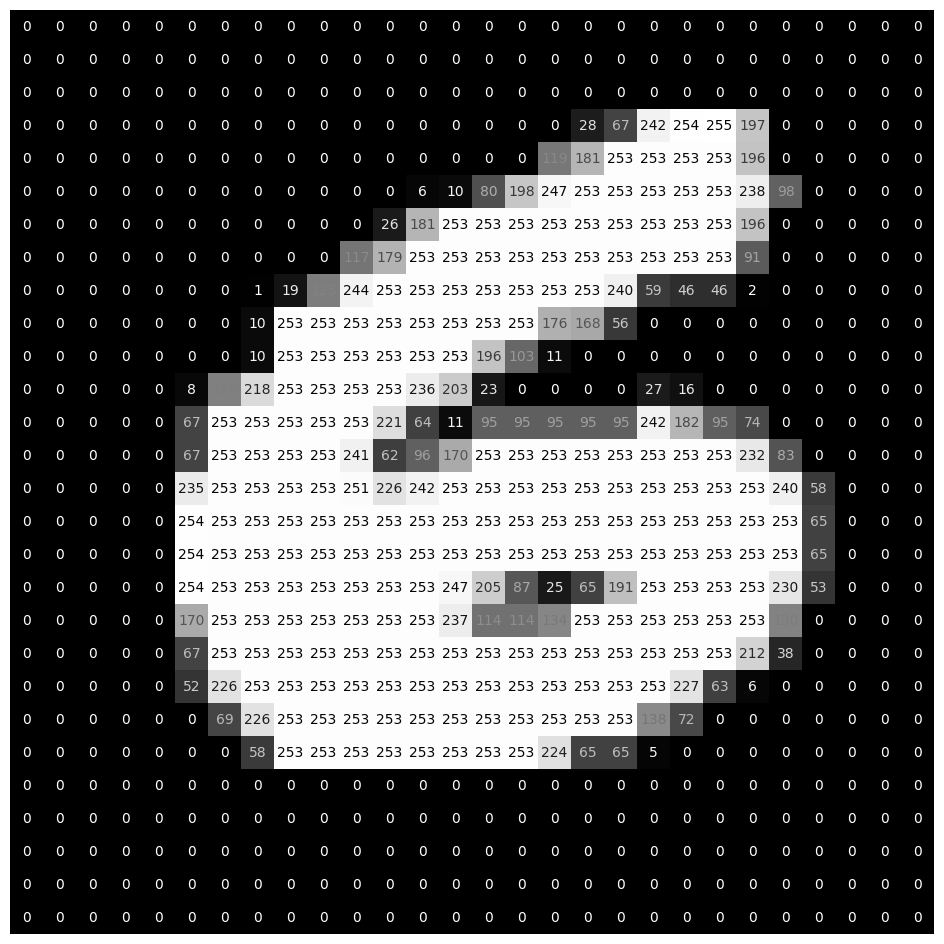

In [9]:
import torch

torch.manual_seed(42)

fig = plt.figure(figsize = (12,12)) 
ax0 = fig.add_subplot(1, 1, 1)

rand_ind = torch.randint(0, len(train_val_dataset), size=[1]).item()

img0 = train_val_dataset.data[rand_ind]
img0 = img0.numpy()
img_pixel_superimpose(img0, ax0)

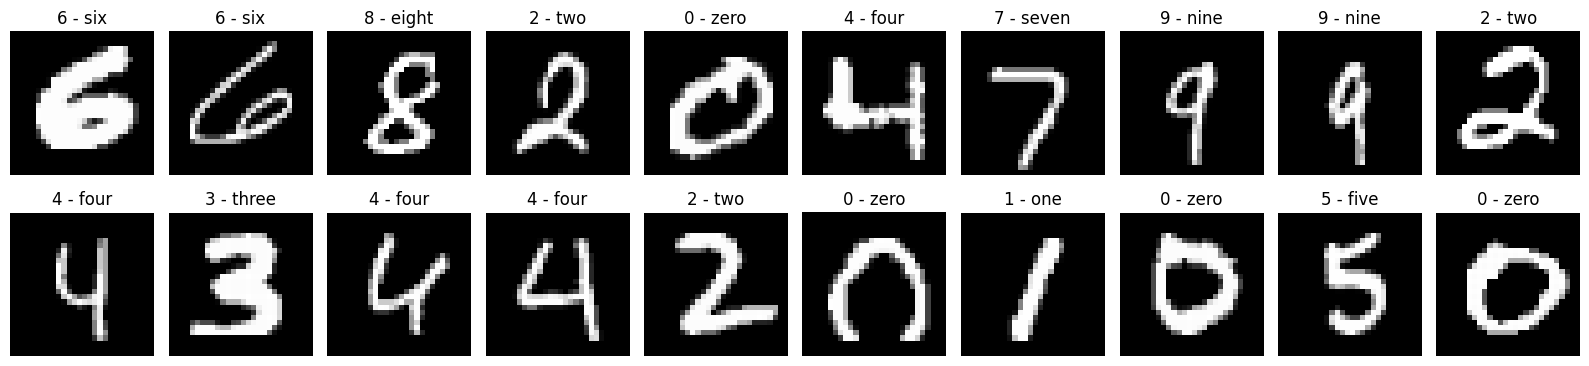

In [10]:
import torch
torch.manual_seed(42)     # Search on the internet why '42' is special or
                          # even '42 * 2' = 84

fig = plt.figure(figsize=(16, 4))
rows, cols = 2, 10

for i in range(1, (rows*cols) + 1):
    rand_ind = torch.randint(0, len(train_val_dataset), size=[1]).item()
    img, lab = train_val_dataset[rand_ind]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap='gray')
    plt.title(f"{class_names[lab]}")
    plt.axis(False)
    plt.tight_layout()

## Transform the dataset

In [11]:
from torchvision import transforms

### ToTensor()

In [12]:
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="./datasets", train=False, download=False, transform=transforms.ToTensor())
train_val_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
img, lab = train_val_dataset[0]
img, lab

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
img.min(), img.max()  # The ToTensor() transformation scaled down 0-255 --> 0-1

(tensor(0.), tensor(1.))

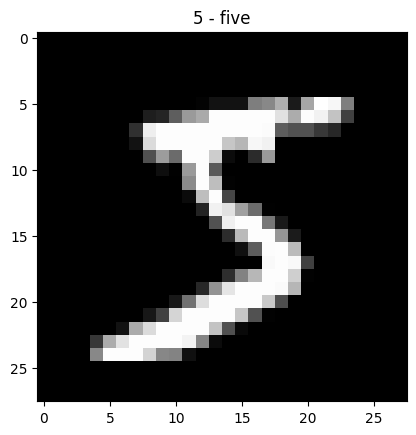

In [15]:
plt.imshow(img.squeeze_(), cmap='gray')
plt.title(f"{class_names[lab]}");

### Normalization

In [16]:
# Calculate mean and std

imgs = torch.stack([img for img, _ in train_val_dataset], dim=0)
print(imgs.shape)

torch.Size([60000, 1, 28, 28])


In [17]:
mean = imgs.view(1, -1).mean(dim=1)    # or imgs.mean()
std = imgs.view(1, -1).std(dim=1)     # or imgs.std()
mean, std

(tensor([0.1307]), tensor([0.3081]))

In [18]:
mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])
mnist_transforms

Compose(
    ToTensor()
    Normalize(mean=tensor([0.1307]), std=tensor([0.3081]))
)

In [19]:
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=mnist_transforms)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=False, transform=mnist_transforms)
train_val_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=tensor([0.1307]), std=tensor([0.3081]))
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=tensor([0.1307]), std=tensor([0.3081]))
            ))

In [20]:
img, label = train_val_dataset[0]
img, label

(tensor([[[-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
          [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
          [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
          [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
           -0.4241, -0.4241, -0.424

In [21]:
img.min(), img.max()

(tensor(-0.4241), tensor(2.8215))

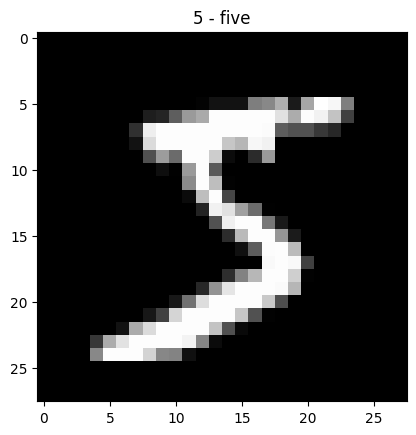

In [22]:
plt.imshow(img.squeeze_(), cmap='gray')
plt.title(f"{class_names[label]}");

## Split dataset into Train/Val/Test

In [23]:
train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])
train_dataset, val_dataset

(<torch.utils.data.dataset.Subset at 0x7f825a70b640>,
 <torch.utils.data.dataset.Subset at 0x7f825a70afb0>)

In [24]:
len(train_dataset), len(val_dataset), len(test_dataset)

(54000, 6000, 10000)

In [25]:
len(train_dataset), len(train_dataset.dataset)  # Remember train_dataset.dataset access parent train_val_dataset

(54000, 60000)

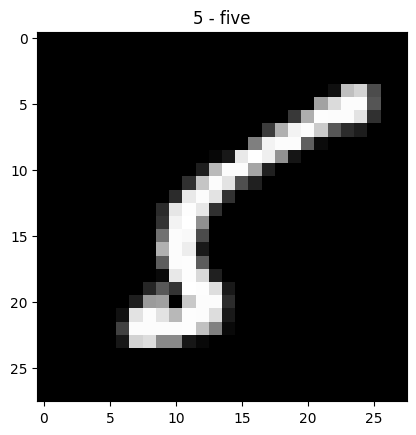

In [26]:
# Validate train dataset is working fine
img, label = train_dataset[0]
plt.imshow(img.squeeze_(), cmap='gray')
plt.title(f"{class_names[label]}");

## Dataloader preparation

In [27]:
from torch.utils.data import DataLoader

In [28]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_dataloader, val_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f825a76b1c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f825a724cd0>)

In [29]:
img, label = train_dataloader.dataset[0]
img.shape, label

(torch.Size([1, 28, 28]), 5)

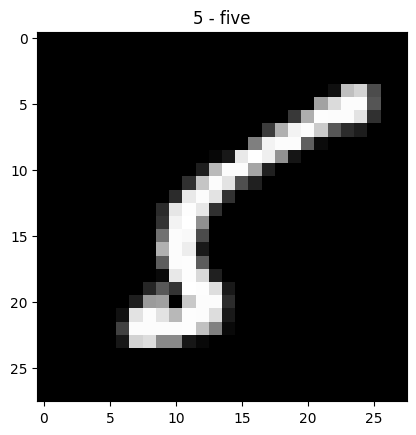

In [30]:
# Validate the dataloader is working fine
plt.imshow(img.squeeze_(), cmap='gray')
plt.title(f"{class_names[label]}");

In [31]:
no_train_batches = len(train_dataloader.dataset) / train_dataloader.batch_size
no_val_batches = len(val_dataloader.dataset) / val_dataloader.batch_size
no_test_batches = len(test_dataloader.dataset) / test_dataloader.batch_size

# Let's see no of batches that we have now with the current batch-size
no_train_batches, no_val_batches, no_test_batches

(1687.5, 187.5, 312.5)

In [32]:
len(train_dataloader), len(val_dataloader), len(test_dataloader)   # Actual lengths show wrapping at the end

(1688, 188, 313)

# Model Architecture, Construct Training & Evaluation Pipeline

## LeNet5_V1

In [33]:
from torch import nn

In [34]:
class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            #1
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),   # 28*28->32*32-->28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14
            
            #2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )
        
    def forward(self, x):
        return self.classifier(self.feature(x))
    

In [35]:
model_lenet5v1 = LeNet5V1()
model_lenet5v1

LeNet5V1(
  (feature): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): Tanh()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): Tanh()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)

### Model summary

In [36]:
from torchinfo import summary

In [37]:
summary(model=model_lenet5v1, input_size=(1, 1, 28, 28), col_width=20,
                  col_names=['input_size', 'output_size', 'num_params', 'trainable'], row_settings=['var_names'], verbose=0)

/home/inx/anaconda3/envs/pt/lib/python3.10/site-packages/torchinfo/torchinfo.py:462: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/home/inx/.local/lib/python3.10/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
LeNet5V1 (LeNet5V1)                      [1, 1, 28, 28]       [1, 10]              --                   True
├─Sequential (feature)                   [1, 1, 28, 28]       [1, 16, 5, 5]        --                   True
│    └─Conv2d (0)                        [1, 1, 28, 28]       [1, 6, 28, 28]       156                  True
│    └─Tanh (1)                          [1, 6, 28, 28]       [1, 6, 28, 28]       --                   --
│    └─AvgPool2d (2)                     [1, 6, 28, 28]       [1, 6, 14, 14]       --                   --
│    └─Conv2d (3)                        [1, 6, 14, 14]       [1, 16, 10, 10]      2,416                True
│    └─Tanh (4)                          [1, 16, 10, 10]      [1, 16, 10, 10]      --                   --
│    └─AvgPool2d (5)                     [1, 16, 10, 10]      [1, 16, 5, 5]        --                   --
├─Sequential (classifi

### Loss, Optimizer, Metrics

In [38]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_lenet5v1.parameters(), lr=0.001)

from torchmetrics import Accuracy
accuracy = Accuracy(task='multiclass', num_classes=10)

### Train model

In [39]:
from tqdm.notebook import tqdm
from torch.utils.tensorboard import SummaryWriter

from datetime import datetime
import os

# Experiment tracking
timestamp = datetime.now().strftime("%Y-%m-%d")
experiment_name = "MNIST"
model_name = "LeNet5V1"
log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
writer = SummaryWriter(log_dir)

# device-agnostic setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
accuracy = accuracy.to(device)
model_lenet5v1 = model_lenet5v1.to(device)

EPOCHS = 12

for epoch in tqdm(range(EPOCHS)):
    # Training loop
    train_loss, train_acc = 0.0, 0.0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        
        model_lenet5v1.train()
        
        y_pred = model_lenet5v1(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        acc = accuracy(y_pred, y)
        train_acc += acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
        
    # Validation loop
    val_loss, val_acc = 0.0, 0.0
    model_lenet5v1.eval()
    with torch.inference_mode():
        for X, y in val_dataloader:
            X, y = X.to(device), y.to(device)
            
            y_pred = model_lenet5v1(X)
            
            loss = loss_fn(y_pred, y)
            val_loss += loss.item()
            
            acc = accuracy(y_pred, y)
            val_acc += acc
            
        val_loss /= len(val_dataloader)
        val_acc /= len(val_dataloader)
        
    writer.add_scalars(main_tag="Loss", tag_scalar_dict={"train/loss": train_loss, "val/loss": val_loss}, global_step=epoch)
    writer.add_scalars(main_tag="Accuracy", tag_scalar_dict={"train/acc": train_acc, "val/acc": val_acc}, global_step=epoch)
    
    print(f"Epoch: {epoch}| Train loss: {train_loss: .5f}| Train acc: {train_acc: .5f}| Val loss: {val_loss: .5f}| Val acc: {val_acc: .5f}")
            

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 0| Train loss:  0.21738| Train acc:  0.93639| Val loss:  0.08279| Val acc:  0.97739
Epoch: 1| Train loss:  0.07294| Train acc:  0.97741| Val loss:  0.05682| Val acc:  0.98321
Epoch: 2| Train loss:  0.05269| Train acc:  0.98363| Val loss:  0.04661| Val acc:  0.98471
Epoch: 3| Train loss:  0.04109| Train acc:  0.98660| Val loss:  0.05453| Val acc:  0.98288
Epoch: 4| Train loss:  0.03447| Train acc:  0.98904| Val loss:  0.04277| Val acc:  0.98620
Epoch: 5| Train loss:  0.02793| Train acc:  0.99111| Val loss:  0.04167| Val acc:  0.98670
Epoch: 6| Train loss:  0.02326| Train acc:  0.99234| Val loss:  0.05045| Val acc:  0.98388
Epoch: 7| Train loss:  0.02159| Train acc:  0.99321| Val loss:  0.04516| Val acc:  0.98620
Epoch: 8| Train loss:  0.01874| Train acc:  0.99371| Val loss:  0.03969| Val acc:  0.98770
Epoch: 9| Train loss:  0.01693| Train acc:  0.99454| Val loss:  0.03714| Val acc:  0.98803
Epoch: 10| Train loss:  0.01525| Train acc:  0.99495| Val loss:  0.04650| Val acc:  0.9870

### Save model

In [40]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "lenet5_v1_mnist.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


In [41]:
print(f"Saving the model: {MODEL_SAVE_PATH}")
torch.save(obj=model_lenet5v1.state_dict(), f=MODEL_SAVE_PATH)

Saving the model: models/lenet5_v1_mnist.pth


### Load model

In [42]:
model_lenet5_v1_mnist_loaded = LeNet5V1()
model_lenet5_v1_mnist_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_lenet5_v1_mnist_loaded

LeNet5V1(
  (feature): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): Tanh()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): Tanh()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)

### Evaluate model

In [43]:
test_loss, test_acc = 0, 0

model_lenet5_v1_mnist_loaded.to(device)

model_lenet5_v1_mnist_loaded.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = model_lenet5_v1_mnist_loaded(X)
        
        test_loss += loss_fn(y_pred, y)
        test_acc += accuracy(y_pred, y)
        
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

print(f"Test loss: {test_loss: .5f}| Test acc: {test_acc: .5f}")

Test loss:  0.04046| Test acc:  0.98852


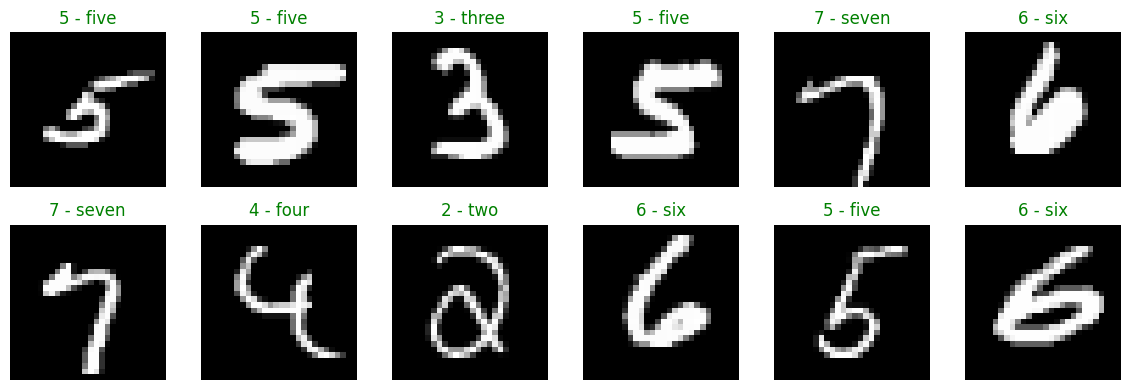

In [44]:
# See random images with their labels
torch.manual_seed(42)  # setting random seed
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12, 4))

rows, cols = 2, 6
for i in range(1, (rows * cols) + 1):
    random_idx = torch.randint(0, len(test_dataset), size=[1]).item()
    img, label_gt = test_dataset[random_idx]
    img_temp = img.unsqueeze(dim=0).to(device)
    # print(img.shape)
    label_pred = torch.argmax(model_lenet5_v1_mnist_loaded(img_temp))
    fig.add_subplot(rows, cols, i)
    img = img.permute(1, 2, 0)    # CWH --> WHC
    plt.imshow(img, cmap='gray')
    if label_pred == label_gt:
        plt.title(class_names[label_pred], color='g')
    else:
        plt.title(class_names[label_pred], color='r')
    plt.axis(False)
    plt.tight_layout();

### XAI

In [45]:
from captum.attr import IntegratedGradients

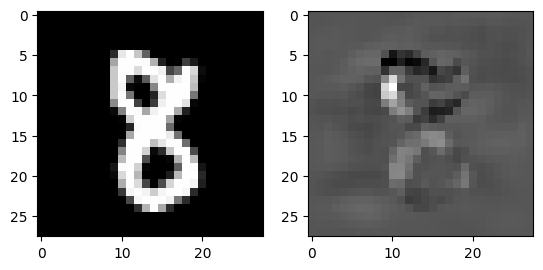

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(108)

random_idx = torch.randint(0, len(test_dataset), size=[1]).item()
img, label = test_dataset[random_idx]
img = img.to(device)

# Instantiate an IntegratedGradients object for the model
ig = IntegratedGradients(model_lenet5_v1_mnist_loaded)

# Compute the attribution scores for the random image
attr, delta = ig.attribute(img.unsqueeze(0), target=label, return_convergence_delta=True)

# Visualize the attribution scores
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img.permute(1, 2, 0).to('cpu'), cmap='gray')
ax[1].imshow(attr[0][0].detach().to('cpu').numpy(), cmap='gray')

### Visualize model metrics

In [2]:
%load_ext tensorboard

In [8]:
%tensorboard --logdir="./runs/" --port 0 --load_fast=false